pose_landmarks:landmark {
  x: 0.37748846411705017
  y: 0.32944726943969727
  z: -1.3701974153518677
  visibility: 0.999613344669342
}
landmark {
  x: 0.4433632791042328
  y: 0.287075400352478
  z: -1.3935915231704712
  visibility: 0.9996814727783203
}
landmark {
  x: 0.48009467124938965
  y: 0.28895485401153564
  z: -1.3935993909835815
  visibility: 0.999703586101532
}
landmark {
  x: 0.5130558013916016
  y: 0.29176920652389526
  z: -1.3937908411026
  visibility: 0.9997149109840393
}
landmark {
  x: 0.3714330792427063
  y: 0.27944415807724
  z: -1.2893954515457153
  visibility: 0.9995548129081726
}
landmark {
  x: 0.35442230105400085
  y: 0.2766619324684143
  z: -1.2898898124694824
  visibility: 0.9993376135826111
}
landmark {
  x: 0.3386306166648865
  y: 0.2742474675178528
  z: -1.2901997566223145
  visibility: 0.9991822838783264
}
landmark {
  x: 0.5790069699287415
  y: 0.3244016170501709
  z: -1.2416529655456543
  visibility: 0.999700665473938
}
landmark {
  x: 0.35922619700431824


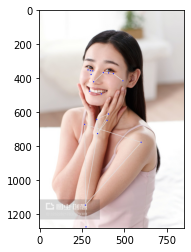

In [3]:
%matplotlib inline
import dave
import mediapipe as mp
import matplotlib.pyplot as plt

# https://google.github.io/mediapipe/solutions/solutions.html
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose

mp_drawing = mp.solutions.drawing_utils

file = '/project/dataset/Private/renwei/6b0a71f36a2427cdc5128c89766740c4e8818b6c.jpg'

holistic = mp_holistic.Holistic(static_image_mode=True)
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True, min_detection_confidence=0.5)

image = dave.opencv_open(file)

image_hight, image_width, _ = image.shape
holistic_results = holistic.process(image)
pose_results = pose.process(image)

print(f'pose_landmarks:{holistic_results.pose_landmarks}')

if holistic_results.pose_landmarks:
  print(\
    f'Nose coordinates: ('\
    f'{holistic_results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width},'\
    f'{holistic_results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_hight})')

annotated_image = image.copy()

mp_drawing.draw_landmarks(annotated_image, holistic_results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

plt.figure()
plt.subplot(1, 1, 1)
plt.imshow(annotated_image)
plt.show()
plt.close()

holistic.close()
pose.close()